## SECTION - 1

#### Q1 why is your proposal important in todays world? How predicting a disease accurately can improve medical treatment?

Answer- In today's world, proposals play a crucial role as they outline ideas, plans, and solutions for various challenges. Predicting diseases accurately using machine learning, especially in the context of COVID-19, enhances medical treatment by enabling early detection, efficient resource allocation, and informed decision-making based on data-driven insights. This leads to faster responses, better patient care, and more effective containment strategies.

#### Q2 How is it going to impact the medical field when it comes to effective screening and reducing health care burden?

Answer- The integration of AI and advanced technologies in the medical field during the COVID-19 pandemic has enabled quicker and more accurate diagnostic testing, contact tracing, and data analysis for understanding virus spread. This has facilitated early detection, effective resource allocation, and improved decision-making, ultimately reducing the burden on healthcare systems.

#### Q3 How your proposed method can be helpful if required in future for any other disease?

Answer- The proposed integration of AI and advanced technologies can be applied to future diseases in similar ways. By leveraging data analytics, predictive modeling, and personalized medicine approaches, healthcare systems can quickly adapt to new challenges. AI-powered tools can aid in early detection, diagnosis, and treatment planning. Automated systems can streamline administrative tasks and resource allocation. Lessons learned from the COVID-19 experience can serve as a foundation for creating adaptable and responsive healthcare frameworks that reduce burden, improve patient outcomes, and enhance overall public health readiness for any future disease outbreaks.

Importing the required modules

In [ ]:
import warnings

warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
corona_tested=pd.read_csv('corona_tested_006.csv')

In [ ]:
corona_tested.head(5)

Ind_ID   Test_date Cough_symptoms  Fever Sore_throat Shortness_of_breath  \
0       1  11-03-2020           TRUE  FALSE        TRUE               FALSE   
1       2  11-03-2020          FALSE   TRUE       FALSE               FALSE   
2       3  11-03-2020          FALSE   TRUE       FALSE               FALSE   
3       4  11-03-2020           TRUE  FALSE       FALSE               FALSE   
4       5  11-03-2020           TRUE  FALSE       FALSE               FALSE   

  Headache    Corona Age_60_above   Sex           Known_contact  
0    FALSE  negative         None  None                  Abroad  
1    FALSE  positive         None  None                  Abroad  
2    FALSE  positive         None  None                  Abroad  
3    FALSE  negative         None  None                  Abroad  
4    FALSE  negative         None  None  Contact with confirmed

## SECTION - II

### Initial Hypothesis with DA Track

Answer- To identify patterns in the COVID-19 dataset and important features for an ML model, we will conduct exploratory data analysis (EDA) to understand the data's characteristics, correlations, and distributions. To identify patterns we can check positive patient covid symptoms as well. For Feature importance analysis and machine learning model training will help pinpoint key predictors of COVID-19 status. Secondly We will used correlation as a Feature Engineering to identify which feature have high relation with our target variable **Corona**. This will affect the accuracy of ML Model.

## SECTION - III

### Data Analysis Approach

#### 1- What approach are you going to take in order to prove or disprove your hypothesis?

Answer- I will perform Exploratory Data Analysis in which i will get the different trends in dataset and able to get deep insights with the help of data visualization. Then after that i will perform feature engineering and give my dataset to ML Models to prove my hypothesis.

#### 2- What feature engineering techniques will be relevant to your project?

Answer- I will simply perform **correlation analysis** on my dataset to get only those features whom have higher relation with my targeted feature **Corona**.

#### 3- Justify your data analysis approach?

Answer- You can check the below analysis. Firstly i have to identify the main objective for these analysis. After that i haved performed Exploratory Data Analysis to find out the patterns in our dataset. And we can see that for those covid positive patients the common symptoms are **Cough**,**Headache** and **Fever**. which means that if there is any patient whom have covid will more likely to have these symptoms.

And in graphs we can see that we have more positive cases in male instead of Female. Secondly when it comes to ML Model then i perform correlation which help us to identify the highly correlated attributes with the targeted one. And at the end you can check the accuracy score which is **96%**.

#### 4- Identify Important Patterns in your data using EDA approach.

Answer- Below I perform Exploratory Data Analysis to find the insights with justification.

# Exploratory Data Analysis

replace all None values with Nan

In [ ]:
columns=corona_tested.columns
corona_tested[columns]=corona_tested[columns].replace('None',np.nan).replace('other',np.nan).replace('Other',np.nan)

In [ ]:
corona_tested.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                   3892
Age_60_above           127320
Sex                     19563
Known_contact          242741
dtype: int64

fill the missing values

In [ ]:
corona_tested=corona_tested.fillna(method="bfill")
corona_tested=corona_tested.fillna(method="ffill")

check if there is any null value still exsiting

In [ ]:
corona_tested.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [ ]:
corona_tested.head()

Ind_ID   Test_date Cough_symptoms  Fever Sore_throat Shortness_of_breath  \
0       1  11-03-2020           TRUE  FALSE        TRUE               FALSE   
1       2  11-03-2020          FALSE   TRUE       FALSE               FALSE   
2       3  11-03-2020          FALSE   TRUE       FALSE               FALSE   
3       4  11-03-2020           TRUE  FALSE       FALSE               FALSE   
4       5  11-03-2020           TRUE  FALSE       FALSE               FALSE   

  Headache    Corona Age_60_above   Sex           Known_contact  
0    FALSE  negative           No  male                  Abroad  
1    FALSE  positive           No  male                  Abroad  
2    FALSE  positive           No  male                  Abroad  
3    FALSE  negative           No  male                  Abroad  
4    FALSE  negative           No  male  Contact with confirmed

In [ ]:
corona_tested['Test_date']

0         11-03-2020
1         11-03-2020
2         11-03-2020
3         11-03-2020
4         11-03-2020
             ...    
278843    30-04-2020
278844    30-04-2020
278845    30-04-2020
278846    30-04-2020
278847    30-04-2020
Name: Test_date, Length: 278848, dtype: object

converting the date format into year-month-date for analysis

In [ ]:
from datetime import datetime
# Convert the Date column format
corona_tested['Test_date'] = corona_tested['Test_date'].apply(lambda x: datetime.strptime(x, "%d-%m-%Y").strftime("%Y-%m-%d"))



In [ ]:
corona_tested.head(3)

Ind_ID   Test_date Cough_symptoms  Fever Sore_throat Shortness_of_breath  \
0       1  2020-03-11           TRUE  FALSE        TRUE               FALSE   
1       2  2020-03-11          FALSE   TRUE       FALSE               FALSE   
2       3  2020-03-11          FALSE   TRUE       FALSE               FALSE   

  Headache    Corona Age_60_above   Sex Known_contact  
0    FALSE  negative           No  male        Abroad  
1    FALSE  positive           No  male        Abroad  
2    FALSE  positive           No  male        Abroad

Now replace boolean values with True as Yes and False for No.  

In [ ]:
columns=corona_tested.columns
corona_tested[columns]=corona_tested[columns].replace('TRUE','Yes').replace('FALSE','No').replace(True,'Yes').replace(False,'No')

In [ ]:
corona_tested.head()

Ind_ID   Test_date Cough_symptoms Fever Sore_throat Shortness_of_breath  \
0       1  2020-03-11            Yes    No         Yes                  No   
1       2  2020-03-11             No   Yes          No                  No   
2       3  2020-03-11             No   Yes          No                  No   
3       4  2020-03-11            Yes    No          No                  No   
4       5  2020-03-11            Yes    No          No                  No   

  Headache    Corona Age_60_above   Sex           Known_contact  
0       No  negative           No  male                  Abroad  
1       No  positive           No  male                  Abroad  
2       No  positive           No  male                  Abroad  
3       No  negative           No  male                  Abroad  
4       No  negative           No  male  Contact with confirmed

### Data Visualization

In [ ]:
third_month=corona_tested[corona_tested['Test_date'].str.contains('2020-03')]
fourth_month=corona_tested[corona_tested['Test_date'].str.contains('2020-04')]

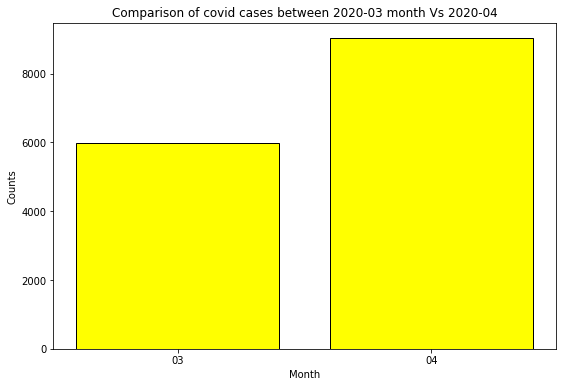

In [ ]:
plt.figure(figsize=[9,6])
plt.bar(["03","04"],[len(third_month[third_month['Corona']=='positive']),len(fourth_month[fourth_month['Corona']=='positive'])],color="yellow",edgecolor='black')
plt.title('Comparison of covid cases between 2020-03 month Vs 2020-04')
plt.xlabel('Month')
plt.ylabel('Counts')
plt.show()

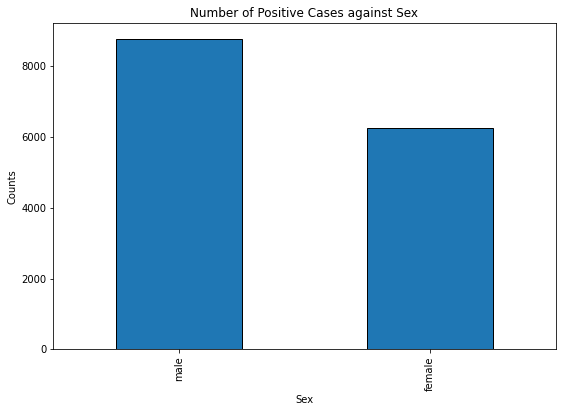

In [ ]:
plt.figure(figsize=[9,6])
corona_tested[corona_tested['Corona']=="positive"]['Sex'].value_counts().plot(kind='bar',edgecolor="black")
plt.title('Number of Positive Cases against Sex')
plt.xlabel('Sex')
plt.ylabel('Counts')
plt.show()

In [ ]:
# Creating a label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Applying label encoding to the 'Category' column
corona_tested['Cough_symptoms'] = encoder.fit_transform(corona_tested['Cough_symptoms'])
corona_tested['Fever'] = encoder.fit_transform(corona_tested['Fever'])
corona_tested['Sore_throat'] = encoder.fit_transform(corona_tested['Sore_throat'])
corona_tested['Shortness_of_breath'] = encoder.fit_transform(corona_tested['Shortness_of_breath'])
corona_tested['Headache'] = encoder.fit_transform(corona_tested['Headache'])
corona_tested['Corona'] = encoder.fit_transform(corona_tested['Corona'])
corona_tested['Age_60_above'] = encoder.fit_transform(corona_tested['Age_60_above'])


In [ ]:
days=[]
for j in corona_tested['Test_date'].str.split('-'):
    days.append(j[2])

In [ ]:
corona_tested['date']=days

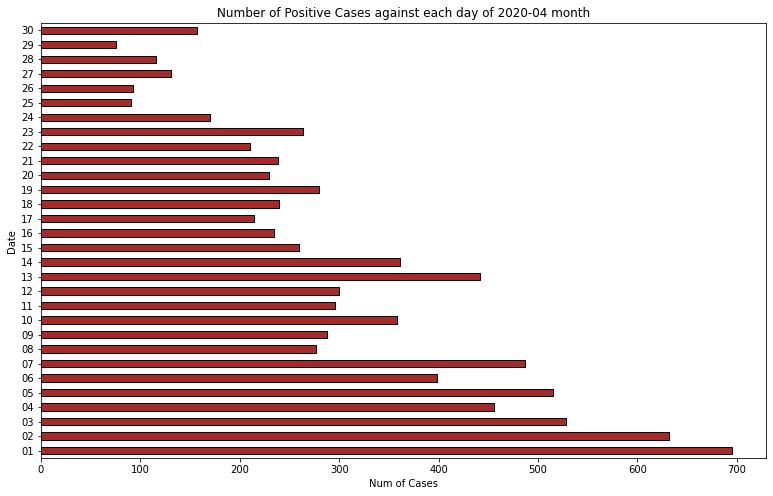

In [ ]:
plt.figure(figsize=[13,8])
forth_month=corona_tested[corona_tested['Test_date'].str.contains('2020-04')]
cases_report_forthMonth=forth_month[forth_month['Corona']==1].groupby('date').sum()
cases_report_forthMonth['Corona'].plot(kind='barh',color='brown',edgecolor='black')
plt.title('Number of Positive Cases against each day of 2020-04 month')
plt.xlabel('Num of Cases')
plt.ylabel('Date')
plt.show()

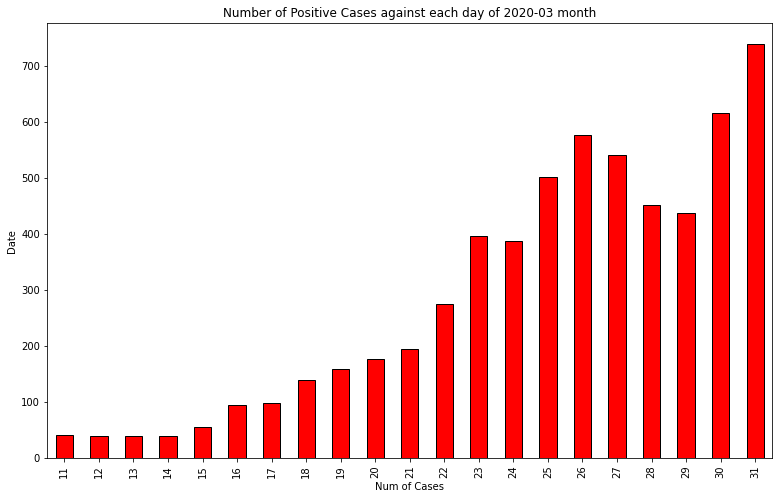

In [ ]:
plt.figure(figsize=[13,8])
thrd_month=corona_tested[corona_tested['Test_date'].str.contains('2020-03')]
cases_report_thrd_month=thrd_month[thrd_month['Corona']==1].groupby('date').sum()
cases_report_thrd_month['Corona'].plot(kind='bar',color='red',edgecolor='black')
plt.title('Number of Positive Cases against each day of 2020-03 month')
plt.xlabel('Num of Cases')
plt.ylabel('Date')
plt.show()

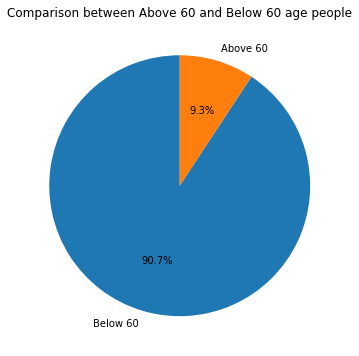

In [ ]:
c=corona_tested['Age_60_above'].value_counts()[0]
z=corona_tested['Age_60_above'].value_counts()[1]

plt.figure(figsize=[9,6])
plt.pie([c,z],labels=["Below 60","Above 60"], autopct='%1.1f%%', startangle=90)
plt.title('Comparison between Above 60 and Below 60 age people')
plt.show()

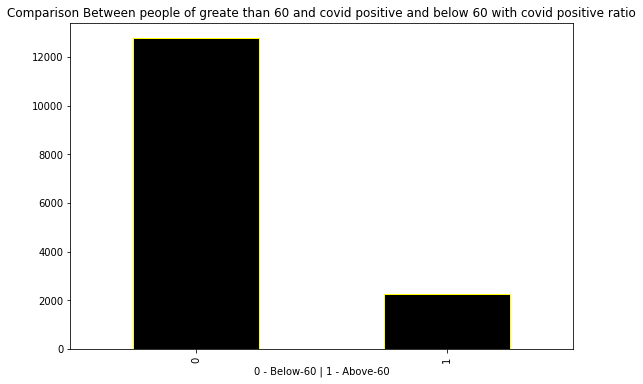

In [ ]:
plt.figure(figsize=[9,6])
corona_tested[corona_tested['Corona']==1]['Age_60_above'].value_counts().plot(kind='bar',color="black",edgecolor='yellow')
plt.title('Comparison Between people of greate than 60 and covid positive and below 60 with covid positive ratio')
plt.xlabel('0 - Below-60 | 1 - Above-60')
plt.show()

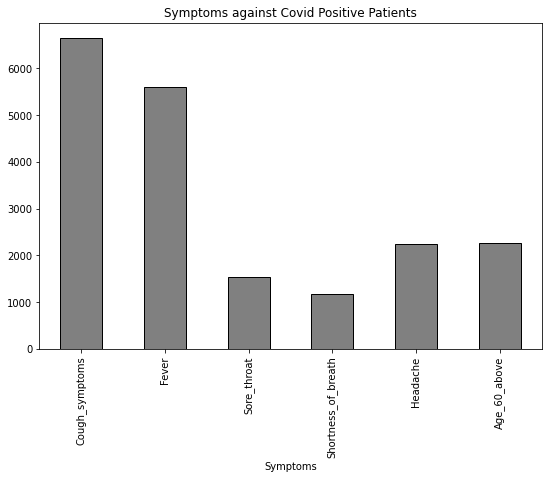

In [ ]:
plt.figure(figsize=[9,6])
corona_tested.drop('Ind_ID',axis=1).groupby('Corona').sum().iloc[1].plot(kind="bar",color='gray',edgecolor='black')
plt.title('Symptoms against Covid Positive Patients')
plt.xlabel('Symptoms')
plt.show()

## Feature Engineering with Correlation

In the below graph you can see that attributes like Fever,Cough_Symptoms,Sore_throat,Headache,Shortness_of_breath have positive relation with predicted variable.

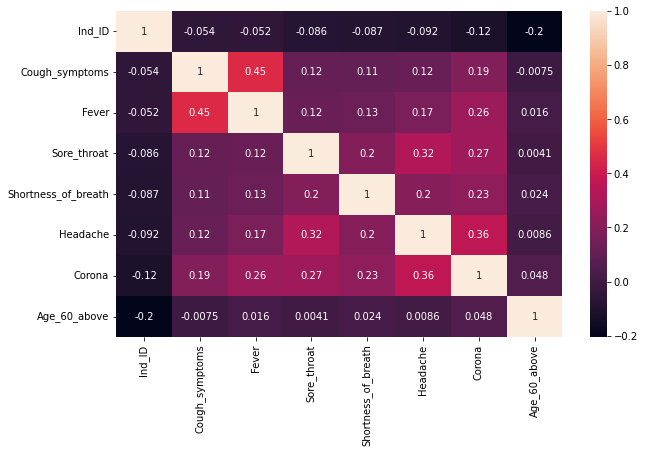

In [ ]:
plt.figure(figsize=[10,6])
sns.heatmap(corona_tested.corr(),annot=True)
plt.show()

In [ ]:
cols=corona_tested.columns

Now Drop The less correlated feature and store it in X, and target variable Corona in y

In [ ]:
X=corona_tested.drop(columns=['Ind_ID','Test_date','Known_contact','date','Corona','Age_60_above','Sex'])
y=corona_tested['Corona']

## SECTION - IV

### Machine Learning Approach

#### 1. What method will you used for machine learning based prediction for covid19?

Answer- According to the dataset i will go with Binary Classification method because the targeted attribute is **Corona** and this attribute is in binary form. And in this approach i will use Logistic Regression, Naive Bayes, Decision Tree for prediction.

#### 2. The Most appropriate model

Answer- Since all of the models giving us same accuracy, but when we check the precision we have 0.96 score for covid negative
and 0.84 for covid positive people. if u check others model the score for positive people is 0.82 which is slightly less from the others models. Hence we can say that **Logistic Regression** is the most appropriate model

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 3. Performing the necessary step to improve the accuracy

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### 4. Performing and comparing all Models (4 Models)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [ ]:
pred=model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, pred)
print(f'Accuracy of Logistic Regression: {accuracy:.2f}')

Accuracy of Logistic Regression: 0.96


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     52772
           1       0.84      0.23      0.35      2998

    accuracy                           0.96     55770
   macro avg       0.90      0.61      0.67     55770
weighted avg       0.95      0.96      0.94     55770



### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_DT=DecisionTreeClassifier()
model_DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
predictions=model_DT.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy of Decision Tree: {accuracy:.2f}')

Accuracy of Decision Tree: 0.96


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     52772
           1       0.82      0.24      0.38      2998

    accuracy                           0.96     55770
   macro avg       0.89      0.62      0.68     55770
weighted avg       0.95      0.96      0.95     55770



### Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_NB=GaussianNB()
model_NB.fit(X_train,y_train)

GaussianNB()

In [ ]:
pred_NB=model_NB.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_NB)
print(f'Accuracy of Naive Bayes: {accuracy:.2f}')

Accuracy of Naive Bayes: 0.96


In [ ]:
print(classification_report(y_test,pred_NB))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     52772
           1       0.82      0.24      0.38      2998

    accuracy                           0.96     55770
   macro avg       0.89      0.62      0.68     55770
weighted avg       0.95      0.96      0.95     55770



### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
n_estimators=100
model_RFC=RandomForestClassifier(n_estimators=n_estimators, random_state=42)

In [ ]:
model_RFC.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
predictions_RFC=model_RFC.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions_RFC)
print(f'Accuracy of Random Forest Classifier: {accuracy:.2f}')

Accuracy of Random Forest Classifier: 0.96


In [ ]:
print(classification_report(y_test,predictions_RFC))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     52772
           1       0.82      0.24      0.38      2998

    accuracy                           0.96     55770
   macro avg       0.89      0.62      0.68     55770
weighted avg       0.95      0.96      0.95     55770



# Thanks